In [308]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [309]:
df=pd.read_csv(r'C:\Users\Deepak Raj\Desktop\Data_Science\Machine Learning\Data\accidental-deaths-in-usa-monthly.csv')

In [310]:
df

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017
...,...,...
67,1978-08,9827
68,1978-09,9110
69,1978-10,9070
70,1978-11,8633


## Basic checks

In [311]:
#basic information about givan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Month                                           72 non-null     object
 1   Accidental deaths in USA: monthly, 1973 ? 1978  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [312]:
#statistical information about data
df.describe()

,"Accidental deaths in USA: monthly, 1973 ? 1978"
count,72.000000
mean,8787.736111
std,958.338013
min,6892.000000
25%,8089.000000
50%,8728.500000
75%,9323.250000
max,11317.000000


In [313]:
#change heading
df.rename({'Accidental deaths in USA: monthly, 1973 ? 1978':'Accidental_deaths_in_USA_monthly_b/w_1973_to_1978'},inplace=True,axis=1)

In [314]:
df

,Month,Accidental_deaths_in_USA_monthly_b/w_1973_to_1978
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017
...,...,...
67,1978-08,9827
68,1978-09,9110
69,1978-10,9070
70,1978-11,8633


In [315]:
#change column to index
df = df.set_index('Month')

In [316]:
df

,Accidental_deaths_in_USA_monthly_b/w_1973_to_1978
Month,
1973-01,9007
1973-02,8106
1973-03,8928
1973-04,9137
1973-05,10017
...,...
1978-08,9827
1978-09,9110
1978-10,9070


## Exploratory Data Analysis

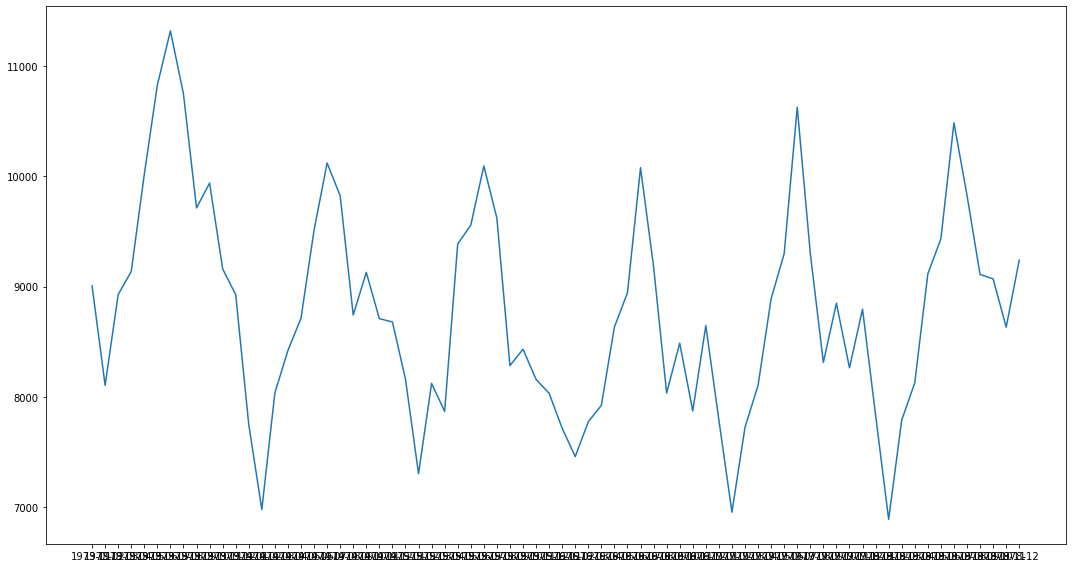

In [317]:
plt.figure(figsize=(15,8))
ax=plt.plot(df)
plt.tight_layout()

In [318]:
#It is seasonality

## Stationary

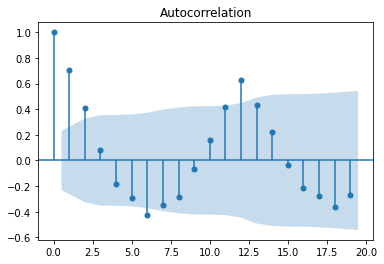

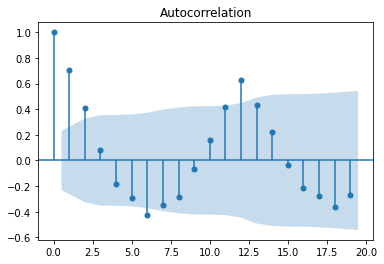

In [319]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)

In [320]:
#difference
df1=df.diff(periods=1)

In [321]:
df1

,Accidental_deaths_in_USA_monthly_b/w_1973_to_1978
Month,
1973-01,NaN
1973-02,-901.0
1973-03,822.0
1973-04,209.0
1973-05,880.0
...,...
1978-08,-657.0
1978-09,-717.0
1978-10,-40.0


In [322]:
df1=df1.iloc[1:]

In [323]:
df1

,Accidental_deaths_in_USA_monthly_b/w_1973_to_1978
Month,
1973-02,-901.0
1973-03,822.0
1973-04,209.0
1973-05,880.0
1973-06,809.0
...,...
1978-08,-657.0
1978-09,-717.0
1978-10,-40.0


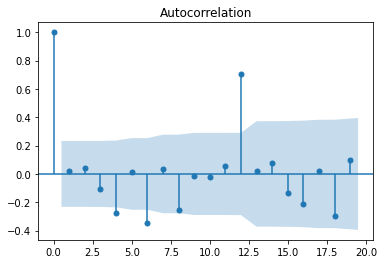

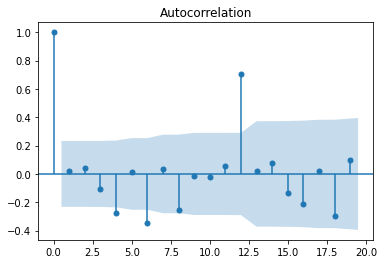

In [324]:
plot_acf(df1)

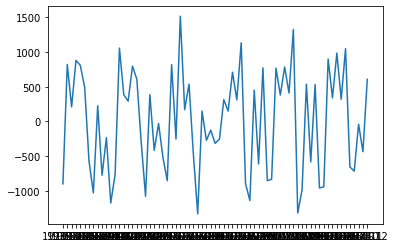

In [325]:
plt.plot(df1)

In [326]:
df1.shape

(71, 1)

In [327]:
#train and test
train=df1[:50]
test=df1[50:]

In [328]:
#Auto Relation
from statsmodels.tsa.ar_model import AR
auto_r=AR(train)

In [329]:
ar_model_fit=auto_r.fit()

In [330]:
predict_ar=ar_model_fit.predict(start=50,end=71)

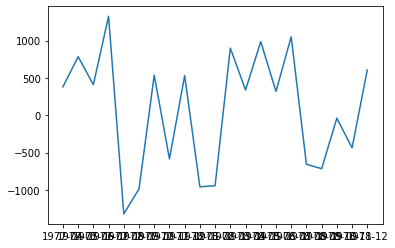

In [331]:
#
plt.plot(test)
plt.show()

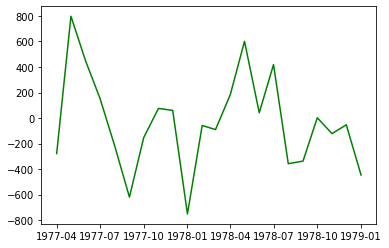

In [332]:
plt.plot(predict_ar,color='green')

## ARIMA

In [333]:
from statsmodels.tsa.arima_model import ARIMA
model_arima=ARIMA(train,order=(1,1,0))
arima_fit=model_arima.fit()

In [334]:
arima_fit.aic

806.6779667894251

In [335]:
predict_arima=arima_fit.forecast(steps=25)[0]

In [336]:
predict_arima

array([-53.81798677, 393.3986485 , 175.96389665, 306.36333667,
       254.72956743, 298.35983504, 292.13526159, 312.00138574,
       318.21337948, 331.5710341 , 341.18912656, 352.76425636,
       363.31520338, 374.40213934, 385.20857445, 396.16180499,
       407.03821259, 417.95482419, 428.85039571, 439.7569782 ,
       450.65779828, 461.56163402, 472.46389157, 483.36697504,
       494.26962627])

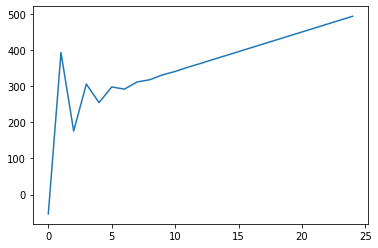

In [337]:
plt.plot(predict_arima)

In [338]:
#iteration
import itertools
p=q=d=range(0,5)
pqd=list(itertools.product(p,q,d))
pqd

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [339]:
for i in pqd:
    try:
        
        model_arima=ARIMA(train,order=i)
        model_arima_fit=model_arima.fit()
        print(i,model_arima_fit.aic)
    except:
        continue
        


(0, 0, 0) 802.2783670933062
(0, 0, 1) 804.2551947195211
(0, 0, 2) 805.8928994480989
(0, 0, 3) 799.2665193399341
(0, 0, 4) 797.2421582811367
(0, 1, 0) 818.6874175863545
(0, 1, 1) 793.139677850569
(0, 1, 2) 795.0759331525026
(0, 1, 3) 796.4844065981264
(0, 1, 4) 793.8506081418335
(0, 2, 0) 853.0786864859156
(0, 2, 1) 808.9422734616143
(0, 2, 2) 788.7434792914886
(0, 2, 3) 790.4969510634096
(0, 2, 4) 791.4351049122116
(1, 0, 0) 804.2524762423454
(1, 0, 1) 803.4090005278717
(1, 1, 0) 806.6779667894251
(1, 1, 1) 795.0656549787353
(1, 1, 2) 794.2091069231799
(1, 2, 0) 824.7318663349213
(1, 2, 1) 798.0455481632098
(2, 0, 0) 806.0923659465243
(2, 0, 1) 799.7253127128483
(2, 1, 0) 806.1984482698954
(2, 1, 1) 796.7863200502932
(2, 2, 0) 813.466148179006
(2, 2, 1) 798.0145700930801
(2, 2, 2) 796.0850633916031
(2, 2, 3) 791.6198985425353
(3, 0, 0) 807.5752720858695
(3, 0, 1) 796.6645844908926
(3, 1, 0) 808.0009643075471
(3, 1, 1) 798.4530140149811
(3, 1, 2) 796.6768940825295
(3, 2, 0) 814.60655482

In [340]:
model_arima_=ARIMA(train,order=(4, 2, 3)) #minimum value
arima_fit_=model_arima_.fit()

In [341]:
arima_fit_.aic #aic

789.501819012457

In [342]:
predict_arima_forecast=arima_fit_.forecast(steps=30)[0] #steps

In [343]:
predict_arima_forecast #forecast

array([-100.30601837,  381.66651026, -324.50540352,  440.60532014,
         53.69173037,  -80.93190194,  490.18703423, -332.50580375,
        554.87006255, -178.52390123,  223.59618866,  265.3715254 ,
       -203.58384187,  579.80162725, -314.284676  ,  471.35234288,
         -3.25563975,   45.68807421,  438.98150703, -293.65252787,
        597.30261541, -224.78739608,  324.16050282,  188.50361002,
       -121.49738866,  557.28977356, -318.62018651,  534.34277674,
        -81.15387036,  141.55750981])

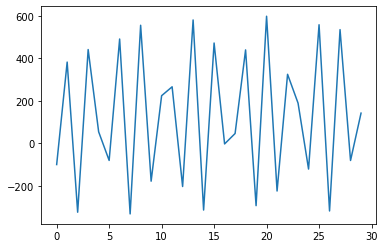

In [344]:
plt.plot(predict_arima_forecast) #plot